In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [66]:
def rgbtohsi(rgb_lwpImg):
    rows = int(rgb_lwpImg.shape[0])
    cols = int(rgb_lwpImg.shape[1])
    r, g, b, = cv2.split(rgb_lwpImg)
    # 歸一化到[0,1]
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    hsi_lwpImg = rgb_lwpImg.copy()
    H, S, I = cv2.split(hsi_lwpImg)
    for i in range(rows):
        for j in range(cols):
            num = 0.5 * ((r[i, j]-g[i, j])+(r[i, j]-b[i, j]))
            den = np.sqrt((r[i, j]-g[i, j])**2+(r[i, j]-b[i, j])*(g[i, j]-b[i, j]))
            theta = float(np.arccos(num/den))

            if den == 0:
                    H = 0
            elif b[i, j] <= g[i, j]:
                H = theta
            else:
                H = 2*3.14169265 - theta

            min_RGB = min(min(b[i, j], g[i, j]), r[i, j])
            sum = b[i, j]+g[i, j]+r[i, j]
            if sum == 0:
                S = 0
            else:
                S = 1 - 3*min_RGB/sum

            H = H/(2*3.14159265)
            I = sum/3.0
            # 输出HSI圖像，擴充到255以方便顯示，一般H分量在[0,2pi]之間，S和I在[0,1]之間
            hsi_lwpImg[i, j, 0] = H*255
            hsi_lwpImg[i, j, 1] = S*255
            hsi_lwpImg[i, j, 2] = I*255
    return hsi_lwpImg


In [67]:
from math import sqrt, cos, acos, degrees, radians, pi
def HSI_to_rgb(hsi_Img):
    rows = int(hsi_Img.shape[0])
    cols = int(hsi_Img.shape[1])
    h, s, i, = cv2.split(hsi_Img)
    h = h / 255.0 *(2*3.14159265)    #H要乘2pi
    s = s / 255.0
    i = i / 255.0
    rgb_Img = hsi_Img.copy()
    r, g, b = cv2.split(rgb_Img)
    for k in range(rows):
        for j in range(cols):
            h[k,j] = degrees(h[k,j])
            # print(i[k,j])
            if 0 <= h[k,j] <= 120 :
                b = i[k,j] * (1 - s[k,j])
                r = i[k,j] * (1 + (s[k,j] * cos(radians(h[k,j])) / cos(radians(60) - radians(h[k,j]))))
                g = i[k,j] * 3 - (r + b)
            elif 120 < h[k,j] <= 240:
                h[k,j] -= 120
                r = i[k,j] * (1 - s[k,j])
                g = i[k,j] * (1 + (s[k,j] * cos(radians(h[k,j])) / cos(radians(60) - radians(h[k,j]))))
                b = 3 * i[k,j] - (r + g)
            elif 240 < h[k,j] <= 360:
                h[k,j] -= 240
                g = i[k,j] * (1 - s[k,j])
                b = i[k,j] * (1 + (s[k,j] * cos(radians(h[k,j])) / cos(radians(60) - radians(h[k,j]))))  #radians徑度
                r = i[k,j] * 3 - (g + b)
            rgb_Img[k, j, 0] = np.clip(r*255,0,255)
            rgb_Img[k, j, 1] = np.clip(g*255,0,255)
            rgb_Img[k, j, 2] = np.clip(b*255,0,255)       
    return rgb_Img

In [68]:
def plot(img):
    plt.imshow(img)
    plt.show()

In [69]:
def plot_gray(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [70]:
bgr_Img = cv2.imread("./LovePeace rose.tif")
rgb_Img = cv2.cvtColor(bgr_Img, cv2.COLOR_BGR2RGB) # 已經用rgb表示而不是bgr

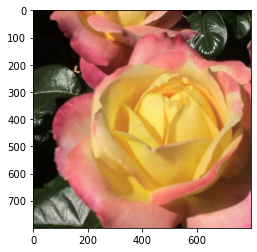

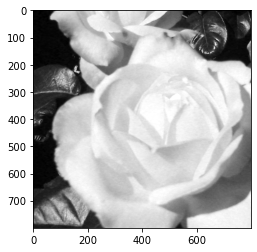

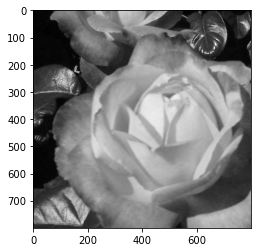

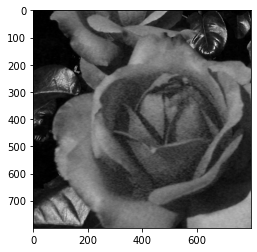

In [71]:
imgR, imgG, imgB, = cv2.split(rgb_Img)

plot(rgb_Img)
plot_gray(imgR)
plot_gray(imgG)
plot_gray(imgB)

imgR = Image.fromarray(np.uint8(imgR))
imgR.save('output/imgR.tif',dpi=(200.0,200.0))
imgG = Image.fromarray(np.uint8(imgG))
imgG.save('output/imgG.tif',dpi=(200.0,200.0))
imgB = Image.fromarray(np.uint8(imgB))
imgB.save('output/imgB.tif',dpi=(200.0,200.0))

C:\Users\angus\AppData\Local\Temp/ipykernel_11988/2277828157.py:15: RuntimeWarning: invalid value encountered in double_scalars
  theta = float(np.arccos(num/den))


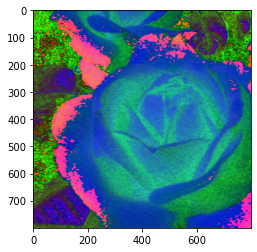

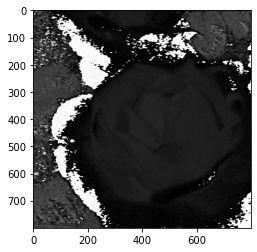

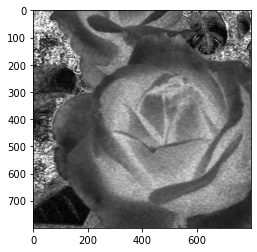

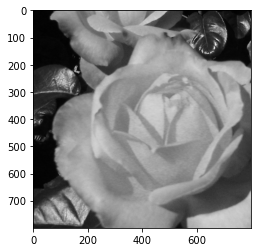

In [72]:
hsi_Img = rgbtohsi(rgb_Img)
imgH, imgS, imgI, = cv2.split(hsi_Img)

plot(hsi_Img)
plot_gray(imgH)
plot_gray(imgS)
plot_gray(imgI)

imgH = Image.fromarray(np.uint8(imgH))
imgH.save('output/imgH.tif',dpi=(200.0,200.0))
imgS = Image.fromarray(np.uint8(imgS))
imgS.save('output/imgS.tif',dpi=(200.0,200.0))
imgI = Image.fromarray(np.uint8(imgI))
imgI.save('output/imgI.tif',dpi=(200.0,200.0))

In [73]:
rgb_Laplacian = cv2.Laplacian(rgb_Img,ddepth=-1, ksize=3) 
rgb_sharpened = cv2.add(rgb_Laplacian, rgb_Img)   #unit8
plot(rgb_sharpened)
rgb_sharp = Image.fromarray(np.uint8(rgb_sharpened))
rgb_sharp.save('output/rgb_sharpened.tif',dpi=(200.0,200.0))

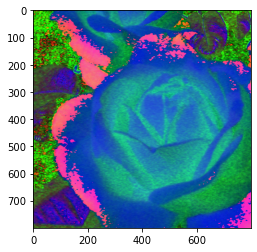

In [79]:
hsi_sharpened = hsi_Img.copy()
hsi_sharpened[:,:,2] = cv2.Laplacian(hsi_Img[:,:,2],ddepth=-1, ksize=3) 
hsi_sharpened[:,:,2] += hsi_Img[:,:,2]

plot(hsi_sharpened)

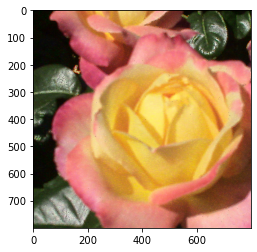

dtype('uint8')

In [89]:
hsi_sharpened_rgb = HSI_to_rgb(hsi_sharpened)  #uint8
plot(hsi_sharpened_rgb)
hsi_sharpening = Image.fromarray(np.uint8(hsi_sharpened_rgb))
hsi_sharpening.save('output/hsi_sharpening.tif',dpi=(200.0,200.0))

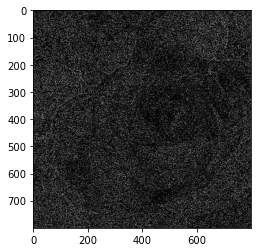

dtype('uint8')

In [96]:
difference = rgb_sharpened - hsi_sharpened_rgb
diff = np.mean(difference,axis=2,dtype=np.uint8)  #dtype預設float64
plot_gray(diff)

differ = Image.fromarray(diff)
differ.save('output/difference.tif',dpi=(200.0,200.0))
difference.dtype
diff.dtype

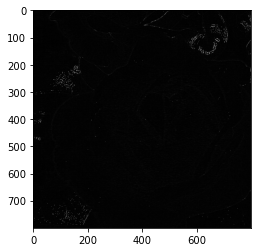

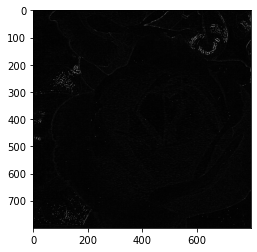

In [97]:
#cv2.subtract跟cv2.absdiff應該一樣
difference = cv2.subtract(rgb_sharpened, hsi_sharpened_rgb)
differ = np.mean(difference,axis=2)
plot_gray(differ)
differ = Image.fromarray(np.uint8(differ))
differ.save('output/differ.tif',dpi=(200.0,200.0))

di = cv2.absdiff(rgb_sharpened,hsi_sharpened_rgb)
di.shape
di = np.mean(di,axis=2)
plot_gray(di)